In [45]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import skew


In [46]:
# Load Dataset
df = pd.read_csv("C:/Users/wguti/OneDrive/Documentos/Projects/ice_coffee_python/iced_coffee_data.csv")


In [119]:
# Overview
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)


   record_id coffee_type    milk_type flavor_additions packaging_type  \
0          1     Arabica  Plant-based              NaN        Plastic   
1          2     Robusta        Whole            Mocha          Paper   
2          3     Arabica         Skim              NaN          Paper   
3          4       Blend         Skim          Vanilla          Glass   
4          4       Blend         Skim          Vanilla          Glass   

  serving_size texture_level  bitterness_level  sugar_pct  foam_thickness  \
0       Medium        Smooth          0.349495   0.738285        0.383326   
1       Medium        Smooth          0.926313   0.454813        0.532906   
2       Medium          Thin          0.408757   0.579127        0.257328   
3        Small        Creamy          0.734636   0.391505        0.293451   
4        Small        Creamy          0.734636   0.391505        0.293451   

   caffeine_strength  price  discount_pct  aftertaste  aroma_strength  \
0           0.534360   3.

In [79]:
# data cleaning
print(df.isna().sum())

record_id               0
coffee_type             0
milk_type               0
flavor_additions     5098
packaging_type          0
serving_size            0
texture_level           0
bitterness_level     1170
sugar_pct             161
foam_thickness        193
caffeine_strength     217
price                 226
discount_pct          325
aftertaste            133
aroma_strength        221
satisfaction         1114
churn_rate           1493
record_timestamp        0
buy_again            1684
dtype: int64


In [80]:
# verify duplicates
num_duplicates = df.duplicated().sum()
print(f'number of duplicated rows: {num_duplicates}')

number of duplicated rows: 0


In [81]:
# show duplicated rows
duplicates = df[df.duplicated()]
print(duplicates.head())

Empty DataFrame
Columns: [record_id, coffee_type, milk_type, flavor_additions, packaging_type, serving_size, texture_level, bitterness_level, sugar_pct, foam_thickness, caffeine_strength, price, discount_pct, aftertaste, aroma_strength, satisfaction, churn_rate, record_timestamp, buy_again]
Index: []


In [82]:
df['flavor_additions'].unique()
df['flavor_additions'].value_counts(dropna=False)



flavor_additions
NaN         5098
Vanilla     3440
Caramel     3401
Hazelnut    2427
Mocha       2359
Name: count, dtype: int64

# let's star cleaning Na values of each column, in this case, we hace 12 variables where we must to go throght each on them. besides, I will clone the data frame for keeping the original dataframe

In [83]:
df_clean = df.copy()

In [84]:
# flavor_additions 
# quantity of unique values and NaN
print('NaN values: ', df_clean['flavor_additions'].isnull().sum)
print('\n Unique values')
print(df_clean['flavor_additions'].value_counts(dropna=False))

NaN values:  <bound method Series.sum of 0         True
1        False
2         True
3        False
4        False
         ...  
16720    False
16721    False
16722    False
16723    False
16724    False
Name: flavor_additions, Length: 16725, dtype: bool>

 Unique values
flavor_additions
NaN         5098
Vanilla     3440
Caramel     3401
Hazelnut    2427
Mocha       2359
Name: count, dtype: int64


In [85]:
# NaN values = 5098
# Unique values:
# Vanilla       3000
# Caramel       2500
# Hazelnut      1800
# Chocolate     1400
# NaN           5098
# in summary NaN values mean 'without flavor additions or an type error'
# so, in this case we will replace NaN values with 'No flavor' 

In [86]:
df_clean['flavor_additions'].fillna('No flavor', inplace=True)

C:\Users\wguti\AppData\Local\Temp\ipykernel_12988\4281698741.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['flavor_additions'].fillna('No flavor', inplace=True)


In [87]:
print('Values NaN in flavor_additions: ', df['flavor_additions'].isnull())

Values NaN in flavor_additions:  0         True
1        False
2         True
3        False
4        False
         ...  
16720    False
16721    False
16722    False
16723    False
16724    False
Name: flavor_additions, Length: 16725, dtype: bool


# bitterness_level 

In [88]:
print('NaN values in bitterness_level:' , df_clean['bitterness_level'].isnull().sum())

NaN values in bitterness_level: 1170


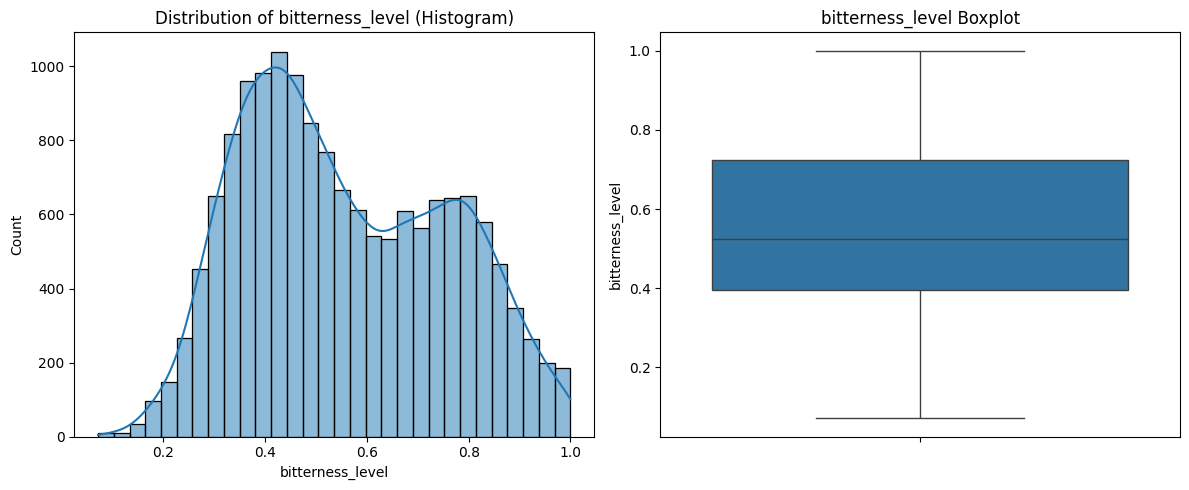

In [89]:
# I will chek its distribution
# Distrution chart

plt.figure(figsize=(12,5))

# Histograma KDE
plt.subplot(1,2,1)
sns.histplot(df_clean['bitterness_level'], kde=True, bins=30)
plt.title('Distribution of bitterness_level (Histogram)')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=df_clean['bitterness_level'])
plt.title('bitterness_level Boxplot')

plt.tight_layout()
plt.show()

In [90]:
# let's calculate skewed
sk_bitterness = skew (df_clean['bitterness_level'], nan_policy='omit')
print(f"Skewed bitterness_level: {sk_bitterness:.4f}")

Skewed bitterness_level: 0.2697


In [91]:
# its distribution is skewed, and according to this variables which is cuantitative
# i will changes those values to MEDIAN
df_clean['bitterness_level'].fillna(df_clean['bitterness_level'].median(), inplace=True)
print("NaN values after of imputation:", df_clean['bitterness_level'].isnull().sum())

NaN values after of imputation: 0


C:\Users\wguti\AppData\Local\Temp\ipykernel_12988\976132720.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['bitterness_level'].fillna(df_clean['bitterness_level'].median(), inplace=True)


# sugar_pct

NaN values in sugar_pct: 161


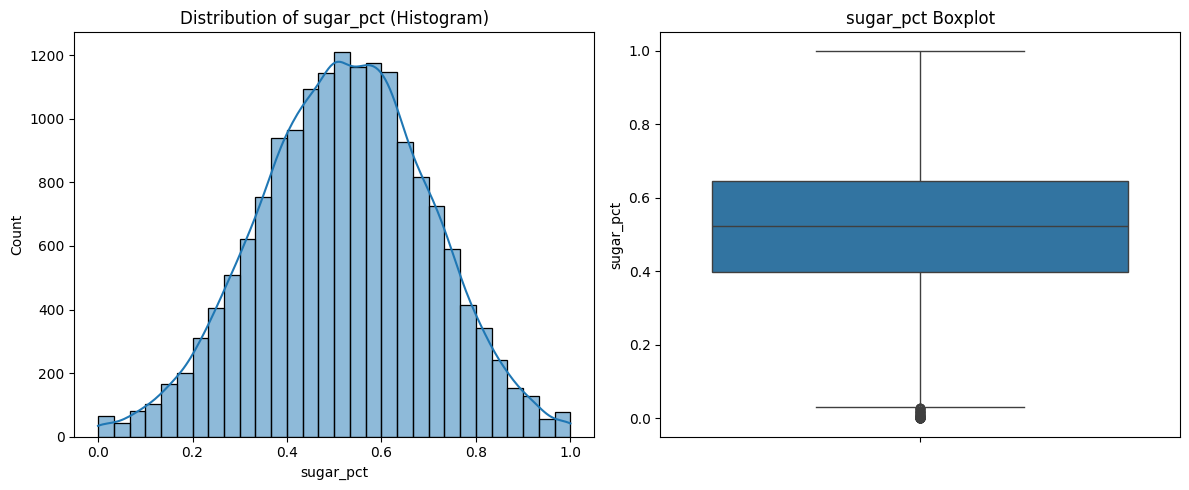

Skewed sugar_pct: -0.0861


In [92]:
# i will doing the same exercice for this cuantitative variable
print('NaN values in sugar_pct:' , df_clean['sugar_pct'].isnull().sum())
# I will chek its distribution
# Distrution chart

plt.figure(figsize=(12,5))

# Histograma KDE
plt.subplot(1,2,1)
sns.histplot(df_clean['sugar_pct'], kde=True, bins=30)
plt.title('Distribution of sugar_pct (Histogram)')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=df_clean['sugar_pct'])
plt.title('sugar_pct Boxplot')

plt.tight_layout()
plt.show()
# let's calculate skewed
sk_bitterness = skew (df_clean['sugar_pct'], nan_policy='omit')
print(f"Skewed sugar_pct: {sk_bitterness:.4f}")

In [95]:
# in this case is safety use Mean in NaN values
df_clean['sugar_pct'].fillna(df_clean['sugar_pct'].mean(), inplace=True)
# Verify
print("Na values in sugar_pct:", df_clean['sugar_pct'].isnull().sum())

# Verify that mean do not change drastically
print("Maean after imputation:", df_clean['sugar_pct'].mean())

Na values in sugar_pct: 0
Maean after imputation: 0.5211673394962346


C:\Users\wguti\AppData\Local\Temp\ipykernel_12988\2175464393.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['sugar_pct'].fillna(df_clean['sugar_pct'].mean(), inplace=True)


# foam_thickness

NaN values in foam_thickness: 193


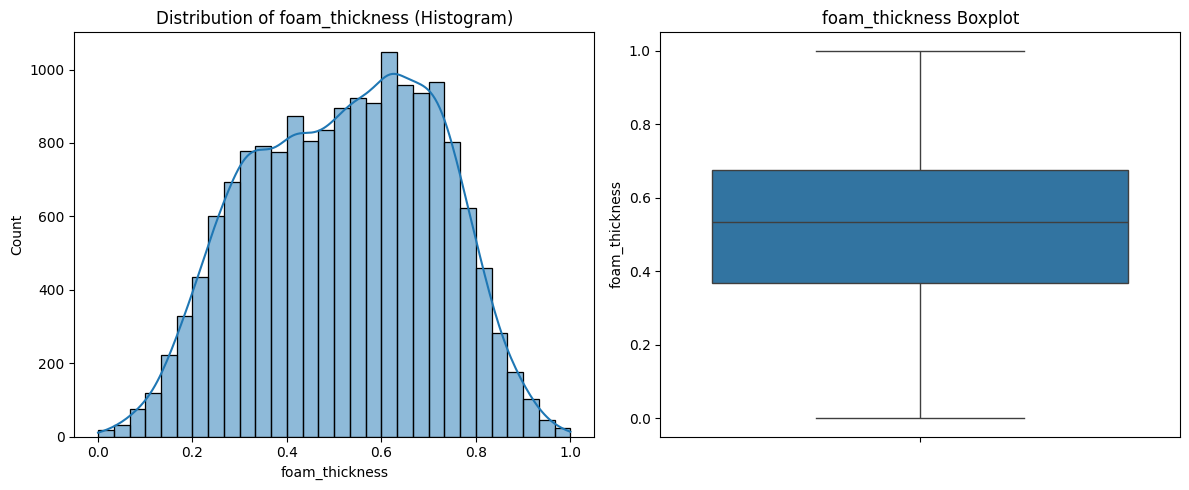

Skewed foam_thickness: -0.1275


In [96]:
# i will doing the same exercice for this cuantitative variable
print('NaN values in foam_thickness:' , df_clean['foam_thickness'].isnull().sum())
# I will chek its distribution
# Distrution chart

plt.figure(figsize=(12,5))

# Histograma KDE
plt.subplot(1,2,1)
sns.histplot(df_clean['foam_thickness'], kde=True, bins=30)
plt.title('Distribution of foam_thickness (Histogram)')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=df_clean['foam_thickness'])
plt.title('foam_thickness Boxplot')

plt.tight_layout()
plt.show()
# let's calculate skewed
sk_bitterness = skew (df_clean['foam_thickness'], nan_policy='omit')
print(f"Skewed foam_thickness: {sk_bitterness:.4f}")

In [97]:
# in this case is safety use Mean in NaN values
df_clean['foam_thickness'].fillna(df_clean['foam_thickness'].mean(), inplace=True)
# Verify
print("Na values in foam_thickness:", df_clean['foam_thickness'].isnull().sum())

# Verify that mean do not change drastically
print("Maean after imputation:", df_clean['foam_thickness'].mean())

Na values in foam_thickness: 0
Maean after imputation: 0.5219447631260519


C:\Users\wguti\AppData\Local\Temp\ipykernel_12988\3215857500.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['foam_thickness'].fillna(df_clean['foam_thickness'].mean(), inplace=True)


# caffeine_strength

NaN values in caffeine_strength: 217


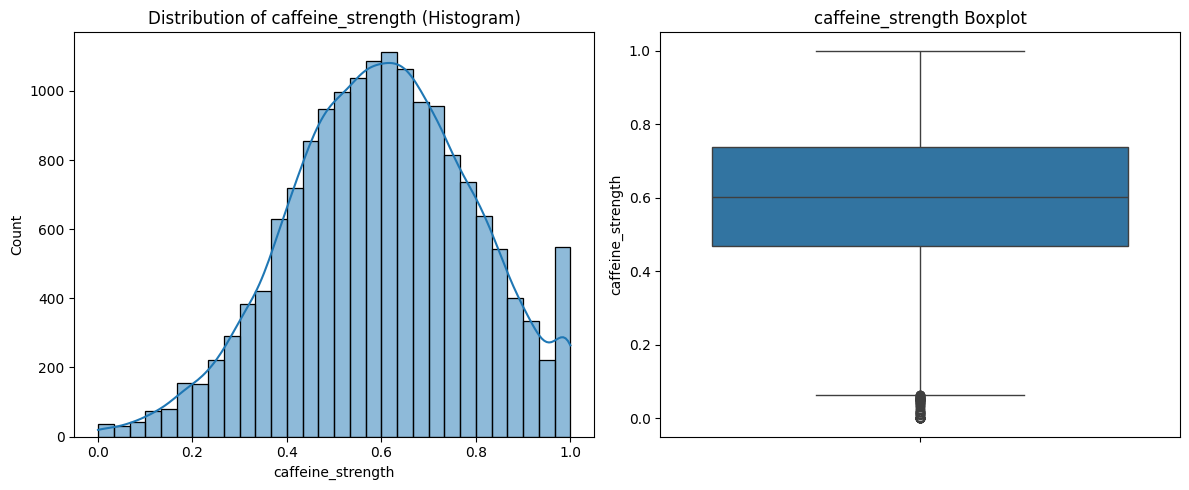

Skewed caffeine_strength: -0.1441


In [98]:
# i will doing the same exercice for this cuantitative variable
print('NaN values in caffeine_strength:' , df_clean['caffeine_strength'].isnull().sum())
# I will chek its distribution
# Distrution chart

plt.figure(figsize=(12,5))

# Histograma KDE
plt.subplot(1,2,1)
sns.histplot(df_clean['caffeine_strength'], kde=True, bins=30)
plt.title('Distribution of caffeine_strength (Histogram)')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=df_clean['caffeine_strength'])
plt.title('caffeine_strength Boxplot')

plt.tight_layout()
plt.show()
# let's calculate skewed
sk_bitterness = skew (df_clean['caffeine_strength'], nan_policy='omit')
print(f"Skewed caffeine_strength: {sk_bitterness:.4f}")

In [99]:
# Impute with mean since skew is low
df_clean['caffeine_strength'].fillna(df_clean['caffeine_strength'].mean(), inplace=True)
# Check missing values after imputation
print("Missing values in caffeine_strength:", df_clean['caffeine_strength'].isnull().sum())

# Check that the mean remains consistent
print("Mean after imputation:", df_clean['caffeine_strength'].mean())

Missing values in caffeine_strength: 0
Mean after imputation: 0.6006245761334574


C:\Users\wguti\AppData\Local\Temp\ipykernel_12988\397934089.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['caffeine_strength'].fillna(df_clean['caffeine_strength'].mean(), inplace=True)


# price 

NaN values in price: 226


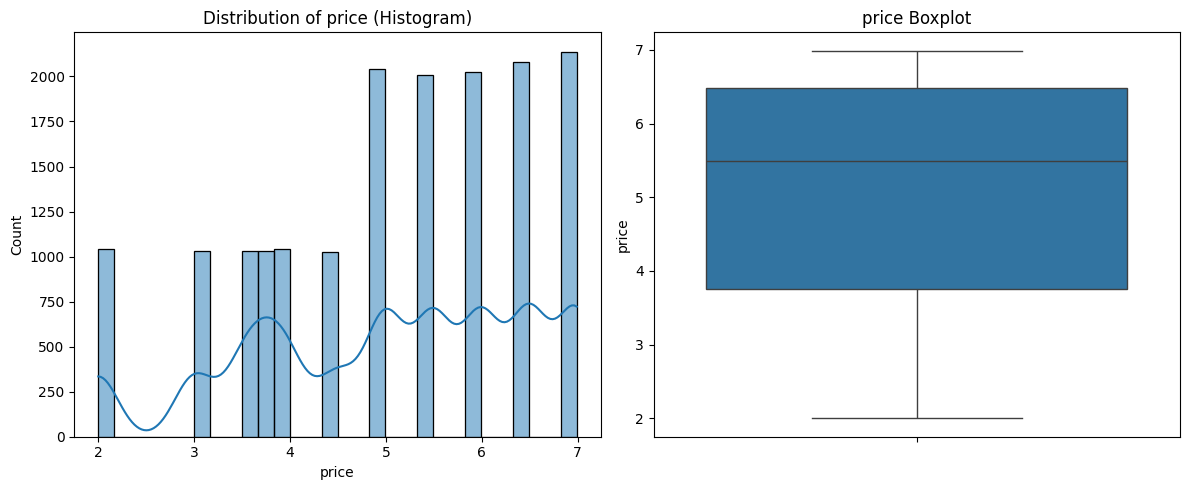

Skewed price: -0.4382


In [100]:
# i will doing the same exercice for this cuantitative variable
print('NaN values in price:' , df_clean['price'].isnull().sum())
# I will chek its distribution
# Distrution chart

plt.figure(figsize=(12,5))

# Histograma KDE
plt.subplot(1,2,1)
sns.histplot(df_clean['price'], kde=True, bins=30)
plt.title('Distribution of price (Histogram)')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=df_clean['price'])
plt.title('price Boxplot')

plt.tight_layout()
plt.show()
# let's calculate skewed
sk_bitterness = skew (df_clean['price'], nan_policy='omit')
print(f"Skewed price: {sk_bitterness:.4f}")

In [ ]:
# Although it is not an extreme skewd, it is high enough to prefer the 
# median over the mean, as the latter could be 
# affected by outliers or extreme concentrations.
# Impute with median due to moderate skew
df_clean['price'].fillna(df_clean['price'].median(), inplace=True)
# Check missing values after imputation
print("Missing values in price:", df_clean['price'].isnull().sum())

# Check that the median remains consistent
print("Median after imputation:", df_clean['price'].median())

Missing values in price: 0
Median after imputation: 5.49


C:\Users\wguti\AppData\Local\Temp\ipykernel_12988\4293819379.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['price'].fillna(df_clean['price'].median(), inplace=True)


# discount_pct 

NaN values in discount_pct: 325


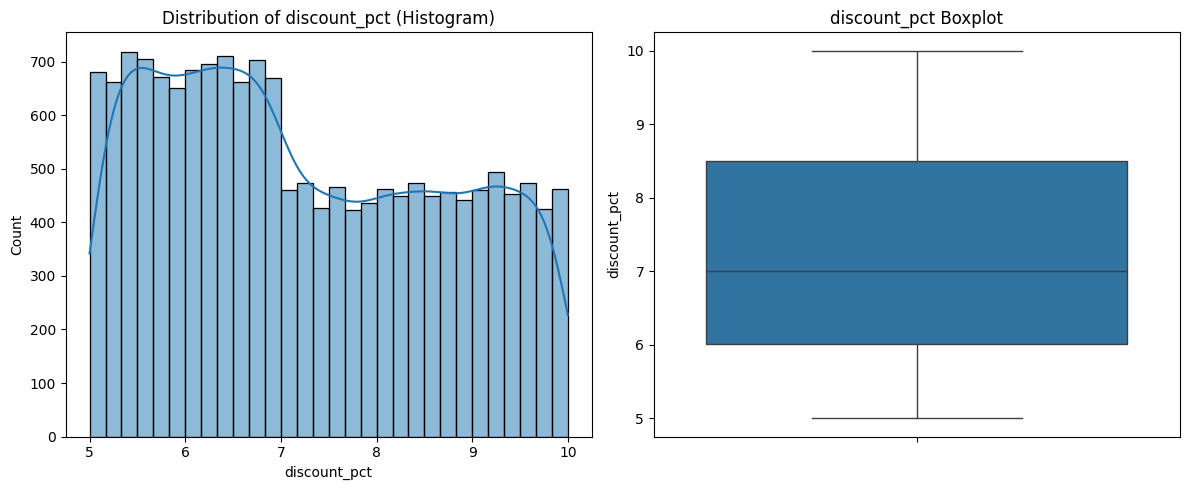

Skewed discount_pct: 0.2563


In [102]:
# i will doing the same exercice for this cuantitative variable
print('NaN values in discount_pct:' , df_clean['discount_pct'].isnull().sum())
# I will chek its distribution
# Distrution chart

plt.figure(figsize=(12,5))

# Histograma KDE
plt.subplot(1,2,1)
sns.histplot(df_clean['discount_pct'], kde=True, bins=30)
plt.title('Distribution of discount_pct (Histogram)')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=df_clean['discount_pct'])
plt.title('discount_pct Boxplot')

plt.tight_layout()
plt.show()
# let's calculate skewed
sk_bitterness = skew (df_clean['discount_pct'], nan_policy='omit')
print(f"Skewed discount_pct: {sk_bitterness:.4f}")

In [ ]:
# Although the skewed is not very strong, I have been using the median in 
# similar variables (like price) to maintain consistency, 
# especially when there are extreme values or the distribution 
# is not symmetrical.
# Impute with median due to moderate skew
df_clean['discount_pct'].fillna(df_clean['discount_pct'].median(), inplace=True)
# Check missing values after imputation
print("Missing values in discount_pct:", df_clean['discount_pct'].isnull().sum())

# Check that the median remains consistent
print("Median after imputation:", df_clean['discount_pct'].median())

Missing values in discount_pct: 0
Median after imputation: 6.996615634299815


C:\Users\wguti\AppData\Local\Temp\ipykernel_12988\4121423689.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['discount_pct'].fillna(df_clean['discount_pct'].median(), inplace=True)


# aftertaste 

NaN values in aftertaste: 133


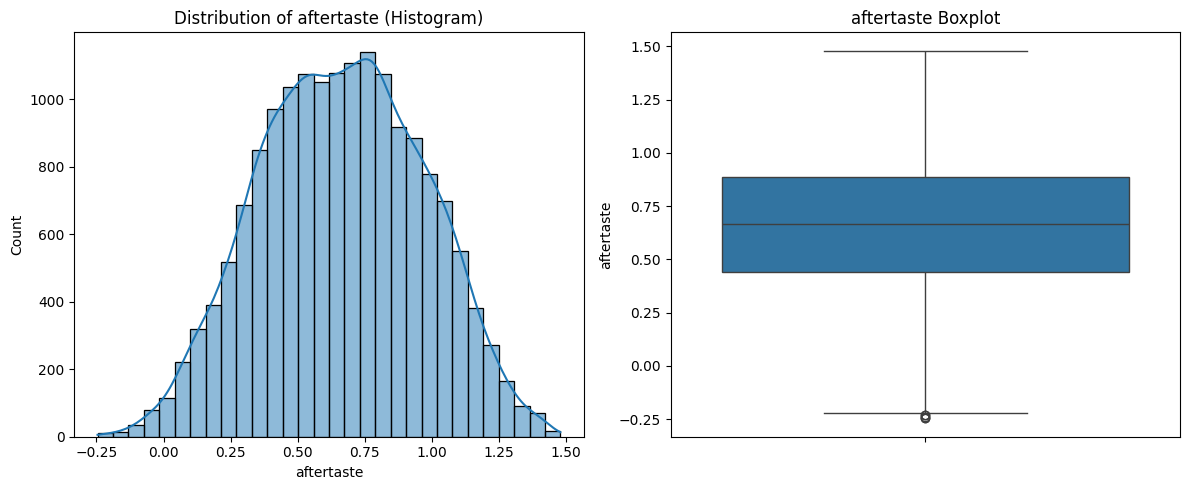

Skewed aftertaste: -0.0232


In [104]:
# i will doing the same exercice for this cuantitative variable
print('NaN values in aftertaste:' , df_clean['aftertaste'].isnull().sum())
# I will chek its distribution
# Distrution chart

plt.figure(figsize=(12,5))

# Histograma KDE
plt.subplot(1,2,1)
sns.histplot(df_clean['aftertaste'], kde=True, bins=30)
plt.title('Distribution of aftertaste (Histogram)')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=df_clean['aftertaste'])
plt.title('aftertaste Boxplot')

plt.tight_layout()
plt.show()
# let's calculate skewed
sk_bitterness = skew (df_clean['aftertaste'], nan_policy='omit')
print(f"Skewed aftertaste: {sk_bitterness:.4f}")

In [105]:
# this variable has an almost perfect distribution, using the mean would be 
# the most appropriate from a statistical point of view.
# Impute with mean since skew is very low
df_clean['aftertaste'].fillna(df_clean['aftertaste'].mean(), inplace=True)
# Check missing values after imputation
print("Missing values in aftertaste:", df_clean['aftertaste'].isnull().sum())

# Check that the mean remains consistent
print("Mean after imputation:", df_clean['aftertaste'].mean())

Missing values in aftertaste: 0
Mean after imputation: 0.664432127950086


C:\Users\wguti\AppData\Local\Temp\ipykernel_12988\3138765145.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['aftertaste'].fillna(df_clean['aftertaste'].mean(), inplace=True)


# aroma_strength 

NaN values in aroma_strength: 221


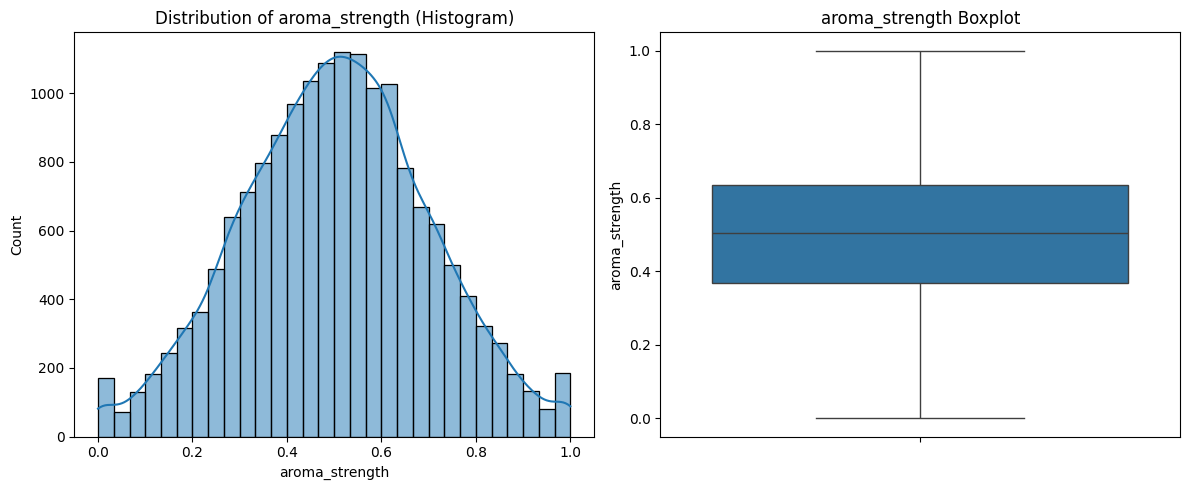

Skewed aroma_strength: -0.0089


In [106]:
# i will doing the same exercice for this cuantitative variable
print('NaN values in aroma_strength:' , df_clean['aroma_strength'].isnull().sum())
# I will chek its distribution
# Distrution chart

plt.figure(figsize=(12,5))

# Histograma KDE
plt.subplot(1,2,1)
sns.histplot(df_clean['aroma_strength'], kde=True, bins=30)
plt.title('Distribution of aroma_strength (Histogram)')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=df_clean['aroma_strength'])
plt.title('aroma_strength Boxplot')

plt.tight_layout()
plt.show()
# let's calculate skewed
sk_bitterness = skew (df_clean['aroma_strength'], nan_policy='omit')
print(f"Skewed aroma_strength: {sk_bitterness:.4f}")

In [107]:
# Since this variable appears to have an almost perfect distribution, 
# the most appropriate method is to use the mean to impute the missing values.
# Impute with mean since skew is almost zero
df_clean['aroma_strength'].fillna(df_clean['aroma_strength'].mean(), inplace=True)
# Check missing values after imputation
print("Missing values in aroma_strength:", df_clean['aroma_strength'].isnull().sum())

# Check that the mean remains consistent
print("Mean after imputation:", df_clean['aroma_strength'].mean())

Missing values in aroma_strength: 0
Mean after imputation: 0.503169049369566


C:\Users\wguti\AppData\Local\Temp\ipykernel_12988\1358774410.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['aroma_strength'].fillna(df_clean['aroma_strength'].mean(), inplace=True)


# satisfaction 

NaN values in satisfaction: 1114


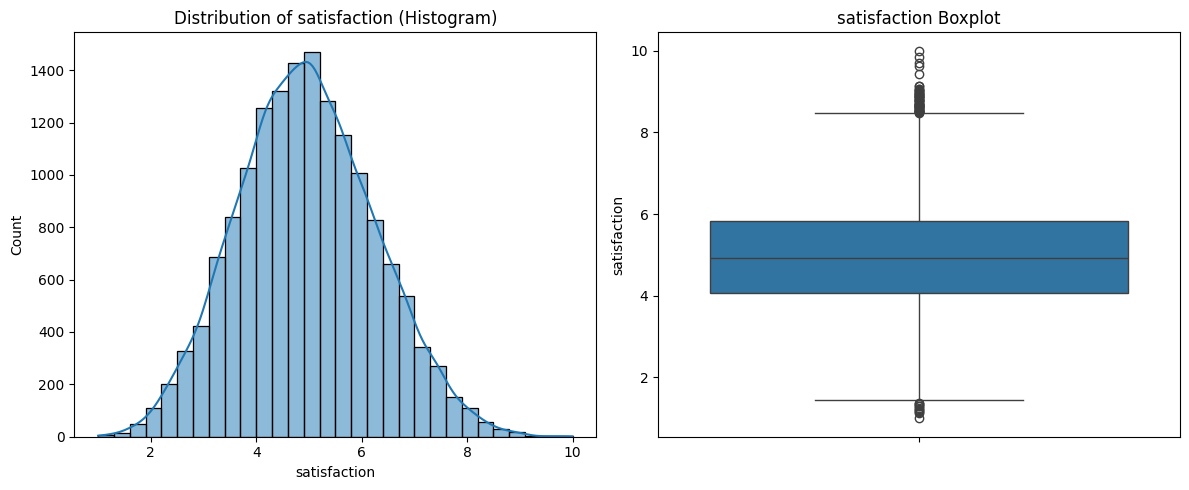

Skewed satisfaction: 0.1436


In [108]:
# i will doing the same exercice for this cuantitative variable
print('NaN values in satisfaction:' , df_clean['satisfaction'].isnull().sum())
# I will chek its distribution
# Distrution chart

plt.figure(figsize=(12,5))

# Histograma KDE
plt.subplot(1,2,1)
sns.histplot(df_clean['satisfaction'], kde=True, bins=30)
plt.title('Distribution of satisfaction (Histogram)')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=df_clean['satisfaction'])
plt.title('satisfaction Boxplot')

plt.tight_layout()
plt.show()
# let's calculate skewed
sk_bitterness = skew (df_clean['satisfaction'], nan_policy='omit')
print(f"Skewed satisfaction: {sk_bitterness:.4f}")

In [110]:
# Since there is moderate bias and possible outliers, it is better to use 
# the median to impute the missing values in satisfaction. 
# This ensures that they are not affected by extreme values or skewness.
# Impute with median due to moderate skew
df_clean['satisfaction'].fillna(df_clean['satisfaction'].median(), inplace=True)
# Check missing values after imputation
print("Missing values in satisfaction:", df_clean['satisfaction'].isnull().sum())

# Check that the median remains consistent
print("Median after imputation:", df_clean['satisfaction'].median())

Missing values in satisfaction: 0
Median after imputation: 4.92388078687667


C:\Users\wguti\AppData\Local\Temp\ipykernel_12988\2175457708.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['satisfaction'].fillna(df_clean['satisfaction'].median(), inplace=True)


# churn_rate 

NaN values in satischurn_ratefaction: 1493


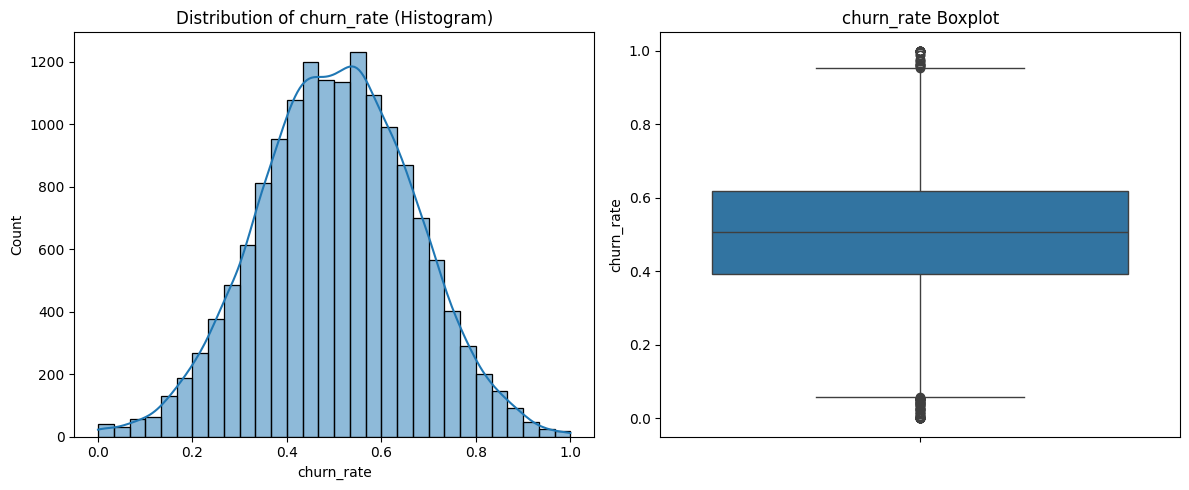

Skewed churn_rate: -0.0575


In [112]:
# i will doing the same exercice for this cuantitative variable
print('NaN values in satischurn_ratefaction:' , df_clean['churn_rate'].isnull().sum())
# I will chek its distribution
# Distrution chart

plt.figure(figsize=(12,5))

# Histograma KDE
plt.subplot(1,2,1)
sns.histplot(df_clean['churn_rate'], kde=True, bins=30)
plt.title('Distribution of churn_rate (Histogram)')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(y=df_clean['churn_rate'])
plt.title('churn_rate Boxplot')

plt.tight_layout()
plt.show()
# let's calculate skewed
sk_bitterness = skew (df_clean['churn_rate'], nan_policy='omit')
print(f"Skewed churn_rate: {sk_bitterness:.4f}")

In [113]:
# Since this variable has a very low bias, the most appropriate approach 
# is to use the mean to impute the missing values. 
# This ensures that they are not affected by extreme values or skewness.
# Impute with mean since skew is very low
df_clean['churn_rate'].fillna(df_clean['churn_rate'].mean(), inplace=True)
# Check missing values after imputation
print("Missing values in churn_rate:", df_clean['churn_rate'].isnull().sum())

# Check that the mean remains consistent
print("Mean after imputation:", df_clean['churn_rate'].mean())

Missing values in churn_rate: 0
Mean after imputation: 0.5042161408718391


C:\Users\wguti\AppData\Local\Temp\ipykernel_12988\649650668.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['churn_rate'].fillna(df_clean['churn_rate'].mean(), inplace=True)


buy_again (Yes o No )

In [114]:
# since buy_again is a categorical variable, I'm going to check how many YES and
# No there are and how many percentage are on each
# count category
print("count 'buy_again':")
print(df_clean['buy_again'].value_counts(dropna=False))

# Percentage of each category
print("\nPercentage 'buy_again':")
print(df_clean['buy_again'].value_counts(dropna=False, normalize=True) * 100)

count 'buy_again':
buy_again
No     7837
Yes    7204
NaN    1684
Name: count, dtype: int64

Percentage 'buy_again':
buy_again
No     46.857997
Yes    43.073244
NaN    10.068759
Name: proportion, dtype: float64


C:\Users\wguti\AppData\Local\Temp\ipykernel_12988\1521558782.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='buy_again', palette='viridis')


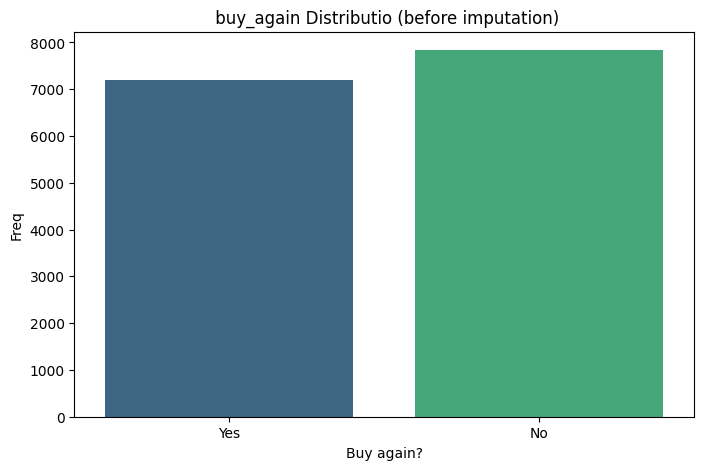

In [115]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_clean, x='buy_again', palette='viridis')
plt.title(' buy_again Distributio (before imputation)')
plt.xlabel('Buy again?')
plt.ylabel('Freq')
plt.show()

The variable is not very unbalanced: there is a fairly similar percentage between 'No' and 'Yes'.The missing values represent approximately 10% of the total, which is considerable, but not majority.
Since 'No' has a slight advantage (46.86%), imputing with the MODE ('No') would be reasonable.
RECOMMENDED ACTION
I will use the MODE to impute the NaNs in buy_again, since:
-It is quick and simple
-It does not distort the data too much
-'No' is the most frequent category.

In [116]:
# imputation with MODE ('No')
mode_value = df_clean['buy_again'].mode()[0]
df_clean['buy_again'].fillna(mode_value, inplace=True)

# check it does not has NaN values
print("Values after imputation:")
print(df_clean['buy_again'].value_counts())

Values after imputation:
buy_again
No     9521
Yes    7204
Name: count, dtype: int64


C:\Users\wguti\AppData\Local\Temp\ipykernel_12988\4267393744.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['buy_again'].fillna(mode_value, inplace=True)


In [118]:
# finally I will check if there are more NaN values
print(df_clean.isna().sum())

record_id            0
coffee_type          0
milk_type            0
flavor_additions     0
packaging_type       0
serving_size         0
texture_level        0
bitterness_level     0
sugar_pct            0
foam_thickness       0
caffeine_strength    0
price                0
discount_pct         0
aftertaste           0
aroma_strength       0
satisfaction         0
churn_rate           0
record_timestamp     0
buy_again            0
dtype: int64


In [121]:
# final overview
# Overview
print(df_clean.head())
print(df_clean.info())
print(df_clean.describe())
print(df_clean.shape)

   record_id coffee_type    milk_type flavor_additions packaging_type  \
0          1     Arabica  Plant-based        No flavor        Plastic   
1          2     Robusta        Whole            Mocha          Paper   
2          3     Arabica         Skim        No flavor          Paper   
3          4       Blend         Skim          Vanilla          Glass   
4          4       Blend         Skim          Vanilla          Glass   

  serving_size texture_level  bitterness_level  sugar_pct  foam_thickness  \
0       Medium        Smooth          0.349495   0.738285        0.383326   
1       Medium        Smooth          0.926313   0.454813        0.532906   
2       Medium          Thin          0.408757   0.579127        0.257328   
3        Small        Creamy          0.734636   0.391505        0.293451   
4        Small        Creamy          0.734636   0.391505        0.293451   

   caffeine_strength  price  discount_pct  aftertaste  aroma_strength  \
0           0.534360   3.

In [122]:
# I will sabe the dataset clean in a new file .csv
df_clean.to_csv('brewchill_data_cleaned.csv', index=False)
print("Dataset save : 'brewchill_data_cleaned.csv'")

Dataset save : 'brewchill_data_cleaned.csv'
